## Data Preprocessing, Cleaning, and Combining
Gather the data from Strava, Samsung, and Apple and merge them together into one DataFrame

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Add the paths to the different data source scripts to the system path
# so we can import them as modules.
apple_path = os.path.abspath('./apple_health_export')
strava_path = os.path.abspath('./strava')
samsung_path = os.path.abspath('./samsung_data')

if apple_path not in sys.path:
    sys.path.append(apple_path)
if strava_path not in sys.path:
    sys.path.append(strava_path)
if samsung_path not in sys.path:
    sys.path.append(samsung_path)

# Import the organisation and feature engineering functions from each script
try:
    from apple_health_export.organise import parse_apple_health_xml, organise_apple_health_data, engineer_activity_features as engineer_apple_features
    from strava.organise import organise_strava_data, engineer_activity_features as engineer_strava_features
    from samsung_data.organise import organise_samsung_data, engineer_activity_features as engineer_samsung_features
    print("Successfully imported all data processing modules.")
except ImportError as e:
    print(f"Error importing modules: {e}")
    print("Please ensure the 'organise.py' files exist in the correct directories.")

Successfully imported all data processing modules.


In [3]:
# --- 1. Process Apple Health Data ---
print("\n" + "="*25)
print("Processing Apple Health Data")
print("="*25)
try:
    # Apple Health requires a two-step process: parse XML, then organise from the generated CSVs
    xml_file_path = os.path.join(apple_path, 'export.xml')
    if os.path.exists(xml_file_path):
        parse_apple_health_xml(xml_file_path)
        apple_data = organise_apple_health_data(apple_path)
        for activity_id, activity_data in apple_data.items():
            if activity_data.get('track_data') is not None:
                features = engineer_apple_features(activity_data['track_data'])
                activity_data['metadata'].update(features)
        
        apple_metadata = [d['metadata'] for d in apple_data.values()]
        apple_df = pd.DataFrame(apple_metadata)
        apple_df['Source'] = 'Apple Health'
        print(f"Successfully processed {len(apple_df)} activities from Apple Health.")
    else:
        print("export.xml not found. Skipping Apple Health.")
        apple_df = pd.DataFrame()
except Exception as e:
    print(f"Could not process Apple Health data: {e}")
    apple_df = pd.DataFrame()


Processing Apple Health Data
Parsing and filtering data from export.xml...
Found 132 total workouts. After filtering, processing 17 activities.
Found 76831 heart rate records, 48873 distance records, and 100928 active energy records.
Found 103 workout routes.

Saved filtered workouts and associated health records to 'output' directory.

Reading pre-processed data from CSV files...
Successfully loaded CSV data.

Merging workouts with nearest workout routes...

Processing 17 workouts...

Processing Activity ID: 20250402_172711 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 540 heart rate points into track data.

Processing Activity ID: 20250403_083841 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 1131 heart rate points into track data.

Processing Activity ID: 20250404_102550 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...
  - Merging 439 heart rate points into track data.

Processing Activity ID: 20250406_113837 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 2558 heart rate points into track data.

Processing Activity ID: 20250408_164740 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...
  - Merging 271 heart rate points into track data.

Processing Activity ID: 20250412_125042 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...
  - Merging 355 heart rate points into track data.

Processing Activity ID: 20250415_171420 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 618 heart rate points into track data.

Processing Activity ID: 20250416_142605 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 735 heart rate points into track data.

Processing Activity ID: 20250417_161448 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...
  - Merging 385 heart rate points into track data.

Processing Activity ID: 20250419_131954 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 1261 heart rate points into track data.

Processing Activity ID: 20250422_152837 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 281 heart rate points into track data.

Processing Activity ID: 20250423_120655 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


  - Merging 308 heart rate points into track data.

Processing Activity ID: 20250424_094646 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...
  - Merging 182 heart rate points into track data.

Processing Activity ID: 20250427_094029 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...
  - Merging 3397 heart rate points into track data.

Processing Activity ID: 20250505_110758 (HKWorkoutActivityTypeRunning)
  - Found GPX file. Reading and cleaning...
  - Merging 46 heart rate points into track data.

Processing Activity ID: 20250609_133258 (HKWorkoutActivityTypeRunning)
  - No route/GPX file associated with this workout.

Processing Activity ID: 20250616_140119 (HKWorkoutActivityTypeRunning)
  - No route/GPX file associated with this workout.

Processing complete.
Successfully processed 17 activities from Apple Health.


/mnt/c/Users/agust/marathon-data/apple_health_export/organise.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


In [4]:
# --- 2. Process Strava Data ---
print("\n" + "="*25)
print("Processing Strava Data")
print("="*25)
try:
    strava_data = organise_strava_data(os.path.join(strava_path, 'strava-data'))
    for activity_id, activity_data in strava_data.items():
        if activity_data.get('track_data') is not None:
            # Note: Strava feature engineering might have different outputs
            features = engineer_strava_features(activity_data['track_data'])
            activity_data['metadata'].update(features)
            
    strava_metadata = [d['metadata'] for d in strava_data.values()]
    strava_df = pd.DataFrame(strava_metadata)
    strava_df['Source'] = 'Strava'
    print(f"Successfully processed {len(strava_df)} activities from Strava.")
except Exception as e:
    print(f"Could not process Strava data: {e}")
    strava_df = pd.DataFrame()


Processing Strava Data
Found 73 activities in activities.csv. Processing...

Processing Activity ID: 10024634662 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/10024634662.gpx
  - Found file: activities/10024634662.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 10182373857 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/10182373857.gpx
  - Found file: activities/10182373857.gpx. Reading and cleaning...

Processing Activity ID: 11233627862 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/11233627862.gpx
  - Found file: activities/11233627862.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 11285184940 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/11285184940.gpx
  - Found file: activities/11285184940.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 11340449640 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/11340449640.gpx
  - Found file: activities/11340449640.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 11395723448 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/11395723448.gpx
  - Found file: activities/11395723448.gpx. Reading and cleaning...

Processing Activity ID: 12510019080 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12510019080.gpx
  - Found file: activities/12510019080.gpx. Reading and cleaning...

Processing Activity ID: 12566939981 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12566939981.gpx
  - Found file: activities/12566939981.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12607881597 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12607881597.gpx
  - Found file: activities/12607881597.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12623862087 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12623862087.gpx
  - Found file: activities/12623862087.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12663557219 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12663557219.gpx
  - Found file: activities/12663557219.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12679783428 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12679783428.gpx
  - Found file: activities/12679783428.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12719565245 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12719565245.gpx
  - Found file: activities/12719565245.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12736037232 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12736037232.gpx
  - Found file: activities/12736037232.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12775939779 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12775939779.gpx
  - Found file: activities/12775939779.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12831299369 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12831299369.gpx
  - Found file: activities/12831299369.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 12847242445 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/12847242445.gpx
  - Found file: activities/12847242445.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13039966337 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13039966337.gpx
  - Found file: activities/13039966337.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13180366766 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13180366766.gpx
  - Found file: activities/13180366766.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13186801508 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13186801508.gpx
  - Found file: activities/13186801508.gpx. Reading and cleaning...

Processing Activity ID: 13192761442 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13192761442.gpx
  - Found file: activities/13192761442.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13208610584 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13208610584.gpx
  - Found file: activities/13208610584.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13229927357 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13229927357.gpx
  - Found file: activities/13229927357.gpx. Reading and cleaning...

Processing Activity ID: 13353525383 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13353525383.gpx
  - Found file: activities/13353525383.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13371574868 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13371574868.gpx
  - Found file: activities/13371574868.gpx. Reading and cleaning...

Processing Activity ID: 13387460557 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13387460557.gpx
  - Found file: activities/13387460557.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13415125596 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13415125596.gpx
  - Found file: activities/13415125596.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13424270895 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13424270895.gpx
  - Found file: activities/13424270895.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13433358978 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13433358978.gpx
  - Found file: activities/13433358978.gpx. Reading and cleaning...

Processing Activity ID: 13449060787 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13449060787.gpx
  - Found file: activities/13449060787.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13477203728 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13477203728.gpx
  - Found file: activities/13477203728.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13486503779 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13486503779.gpx
  - Found file: activities/13486503779.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13495377350 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13495377350.gpx
  - Found file: activities/13495377350.gpx. Reading and cleaning...

Processing Activity ID: 13519390174 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13519390174.gpx
  - Found file: activities/13519390174.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13535215037 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13535215037.gpx
  - Found file: activities/13535215037.gpx. Reading and cleaning...

Processing Activity ID: 13549454535 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13549454535.gpx
  - Found file: activities/13549454535.gpx. Reading and cleaning...

Processing Activity ID: 13558487534 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13558487534.gpx
  - Found file: activities/13558487534.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13582384956 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13582384956.gpx
  - Found file: activities/13582384956.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13602159859 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13602159859.gpx
  - Found file: activities/13602159859.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13611122207 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13611122207.gpx
  - Found file: activities/13611122207.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13619388092 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13619388092.gpx
  - Found file: activities/13619388092.gpx. Reading and cleaning...

Processing Activity ID: 13643389433 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13643389433.gpx
  - Found file: activities/13643389433.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13663277199 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13663277199.gpx
  - Found file: activities/13663277199.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13672659129 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13672659129.gpx
  - Found file: activities/13672659129.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13680846099 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13680846099.gpx
  - Found file: activities/13680846099.gpx. Reading and cleaning...

Processing Activity ID: 13697670039 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13697670039.gpx
  - Found file: activities/13697670039.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13725828692 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13725828692.gpx
  - Found file: activities/13725828692.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13730979623 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13730979623.gpx
  - Found file: activities/13730979623.gpx. Reading and cleaning...

Processing Activity ID: 13744455872 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13744455872.gpx
  - Found file: activities/13744455872.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13762810256 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13762810256.gpx
  - Found file: activities/13762810256.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13855343196 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13855343196.gpx
  - Found file: activities/13855343196.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13865338945 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13865338945.gpx
  - Found file: activities/13865338945.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13874048926 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13874048926.gpx
  - Found file: activities/13874048926.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13892848790 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13892848790.gpx
  - Found file: activities/13892848790.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13919863760 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13919863760.gpx
  - Found file: activities/13919863760.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13930350120 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13930350120.gpx
  - Found file: activities/13930350120.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13939318554 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13939318554.gpx
  - Found file: activities/13939318554.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13958621606 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13958621606.gpx
  - Found file: activities/13958621606.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 13996357044 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/13996357044.gpx
  - Found file: activities/13996357044.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14061308478 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14061308478.gpx
  - Found file: activities/14061308478.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14066582779 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14066582779.gpx
  - Found file: activities/14066582779.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14076547530 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14076547530.gpx
  - Found file: activities/14076547530.gpx. Reading and cleaning...

Processing Activity ID: 14099009133 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14099009133.gpx
  - Found file: activities/14099009133.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14118686974 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14118686974.gpx
  - Found file: activities/14118686974.gpx. Reading and cleaning...

Processing Activity ID: 14155386569 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14155386569.gpx
  - Found file: activities/14155386569.gpx. Reading and cleaning...

Processing Activity ID: 14186935806 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14186935806.gpx
  - Found file: activities/14186935806.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14195116240 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14195116240.gpx
  - Found file: activities/14195116240.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14205264557 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14205264557.gpx
  - Found file: activities/14205264557.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14224176526 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14224176526.gpx
  - Found file: activities/14224176526.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14253317714 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14253317714.gpx
  - Found file: activities/14253317714.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()
/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14261920445 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14261920445.gpx
  - Found file: activities/14261920445.gpx. Reading and cleaning...

Processing Activity ID: 14270608835 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14270608835.gpx
  - Found file: activities/14270608835.gpx. Reading and cleaning...


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()



Processing Activity ID: 14303002789 (Run)
  - Expected GPX file path: /mnt/c/Users/agust/marathon-data/strava/strava-data/activities/14303002789.gpx
  - Found file: activities/14303002789.gpx. Reading and cleaning...

Processing complete.
Successfully processed 73 activities from Strava.


/mnt/c/Users/agust/marathon-data/strava/organise.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pace_min_per_km'] = df['pace_min_per_km'].ffill().bfill()


In [34]:
# --- 3. Process Samsung Health Data ---
print("\n" + "="*25)
print("Processing Samsung Health Data")
print("="*25)
try:
    samsung_data = organise_samsung_data(samsung_path)

    # --- DIAGNOSTIC: Inspect a sample of Samsung HR data ---
    print("\n--- Inspecting a sample of raw Samsung Heart Rate data before TRIMP calculation ---")
    inspected_samsung_hr = False
    # --- End of Diagnostic ---

    for activity_id, activity_data in samsung_data.items():
        # Check if heart rate data exists and is not empty
        if activity_data.get('heart_rate_data') is not None and not activity_data['heart_rate_data'].empty:
            
            # --- DIAGNOSTIC: Print first few HR values for one activity ---
            if not inspected_samsung_hr:
                print(f"Inspecting HR data for Activity ID: {activity_id}")
                print("Sample of HR data being sent to 'engineer_samsung_features':")
                display(activity_data['heart_rate_data'].head())
                inspected_samsung_hr = True
            # --- End of Diagnostic ---

            features = engineer_samsung_features(activity_data['heart_rate_data'])
            activity_data['metadata'].update(features)
            
    samsung_metadata = [d['metadata'] for d in samsung_data.values()]
    samsung_df = pd.DataFrame(samsung_metadata)
    samsung_df['Source'] = 'Samsung Health'
    print(f"Successfully processed {len(samsung_df)} activities from Samsung Health.")
except Exception as e:
    print(f"Could not process Samsung Health data: {e}")
    samsung_df = pd.DataFrame()

display(samsung_df.head())


Processing Samsung Health Data
Checking file: com.samsung.health.device_profile.2025061816.csv
Checking file: com.samsung.health.exercise.2025061816.csv
Found exercise CSV: com.samsung.health.exercise.2025061816.csv
Reading heart rate data from: com.samsung.health.heart_rate.2025061816.csv
  - Found 27364 heart rate records below 90 bpm. Adjusting by +100.
Reading master exercise list from: com.samsung.health.exercise.2025061816.csv

Processing 216 running activities...

Processing Activity ID: 20191004_160055 (Running)
  - Found 132 heart rate records for this activity.

Processing Activity ID: 20191030_164032 (Running)
  - Found 29 heart rate records for this activity.

Processing Activity ID: 20190911_162329 (Running)
  - Found 100 heart rate records for this activity.

Processing Activity ID: 20191101_154416 (Running)
  - Found 33 heart rate records for this activity.

Processing Activity ID: 20190904_161928 (Running)
  - Found 50 heart rate records for this activity.

Processing 

,timestamp,heart_rate_bpm
278,2019-10-04 16:26:15+00:00,170.0
279,2019-10-05 09:21:03+00:00,175.0
280,2019-10-05 15:51:03+00:00,97.0
281,2019-10-05 17:30:48+00:00,98.0
282,2019-10-05 17:50:57+00:00,94.0


Successfully processed 216 activities from Samsung Health.


,Activity ID,Activity Date,Activity Type,Elapsed Time,Distance,Calories,Filename,time_in_hr_zones_s,training_load_hr,avg_heart_rate_bpm,training_load_pace,pace_variability_std,time_in_pace_zones_s,Source
0,20191004_160055,2019-10-04 16:00:55+00:00,Run,1434540,2.832638,163.050003,None,"{'Z1_VeryLight': 110611.0, 'Z2_Light': 56362.0...",69999.18,163.3,0.0,0.0,{},Samsung Health
1,20191030_164032,2019-10-30 16:40:32+00:00,Run,1131590,2.175484,127.610001,None,"{'Z1_VeryLight': 0.0, 'Z2_Light': 0.0, 'Z3_Mod...",65469.72,176.1,0.0,0.0,{},Samsung Health
2,20190911_162329,2019-09-11 16:23:29+00:00,Run,1208220,2.271621,161.279999,None,"{'Z1_VeryLight': 3006.0, 'Z2_Light': 0.0, 'Z3_...",83438.53,172.1,0.0,0.0,{},Samsung Health
3,20191101_154416,2019-11-01 15:44:16+00:00,Run,1380120,2.407817,133.570007,None,"{'Z1_VeryLight': 49201.0, 'Z2_Light': 0.0, 'Z3...",56589.02,172.0,0.0,0.0,{},Samsung Health
4,20190904_161928,2019-09-04 16:19:28+00:00,Run,926740,1.843178,134.529999,None,"{'Z1_VeryLight': 209401.0, 'Z2_Light': 0.0, 'Z...",47531.98,170.9,0.0,0.0,{},Samsung Health


In [6]:
# --- 4. Standardise and Combine DataFrames ---
print("\n" + "="*25)
print("Intelligently Merging Data Sources")
print("="*25)

# Standardise column names across all dataframes BEFORE merging
# This ensures consistency when we combine them.
dataframes = {'Apple Health': apple_df, 'Strava': strava_df, 'Samsung Health': samsung_df}
for source, df in dataframes.items():
    if not df.empty:
        df.rename(columns={
            'Distance': 'Distance_km',
            'Elapsed Time': 'Duration_s',
            'training_load_hr': 'Training Load (HR)',
            'training_load_pace': 'Training Load (Pace)',
            'training_load': 'Training Load (Pace)', # For Strava
            'avg_heart_rate_bpm': 'Avg HR'
        }, inplace=True)
        # Ensure Activity Date is a datetime object for merging
        df['Activity Date'] = pd.to_datetime(df['Activity Date'], utc=True, errors='coerce', dayfirst=(source == 'Samsung Health'))

# --- Create a unified "Health" DataFrame from Apple and Samsung ---
# This will be our source for supplementary data like HR and Calories.
health_df = pd.concat([apple_df, samsung_df], ignore_index=True, sort=False)

# --- Prepare for Merging ---
# We need to sort both the primary (Strava) and supplementary (Health) data by time.
strava_df = strava_df.sort_values('Activity Date').reset_index(drop=True)
if not health_df.empty:
    health_df = health_df.sort_values('Activity Date').reset_index(drop=True)
    # Select only the columns we want to take from the health data
    health_columns_to_merge = [
        'Activity Date', 'Avg HR', 'Calories', 'Training Load (HR)', 'Source'
    ]
    # Filter to only include columns that actually exist
    health_columns_to_merge = [col for col in health_columns_to_merge if col in health_df.columns]
    health_df_for_merge = health_df[health_columns_to_merge]

# --- DIAGNOSTIC STEP: Inspect dates before merging ---
print("\n" + "="*25)
print("Pre-Merge Date Sanity Check")
print("="*25)
if not strava_df.empty:
    print("\n--- Strava DataFrame ('left' side of merge) ---")
    print(f"Date dtype: {strava_df['Activity Date'].dtype}")
    print(f"Number of null dates: {strava_df['Activity Date'].isnull().sum()}")
    if strava_df['Activity Date'].notnull().any():
        print("Date range:")
        print(f"  Start: {strava_df['Activity Date'].min()}")
        print(f"  End:   {strava_df['Activity Date'].max()}")
else:
    print("\n--- Strava DataFrame is EMPTY ---")

if 'health_df_for_merge' in locals() and not health_df_for_merge.empty:
    print("\n--- Health DataFrame ('right' side of merge) ---")
    print(f"Date dtype: {health_df_for_merge['Activity Date'].dtype}")
    print(f"Number of null dates: {health_df_for_merge['Activity Date'].isnull().sum()}")
    if health_df_for_merge['Activity Date'].notnull().any():
        print("Date range:")
        print(f"  Start: {health_df_for_merge['Activity Date'].min()}")
        print(f"  End:   {health_df_for_merge['Activity Date'].max()}")
else:
    print("\n--- Health DataFrame is EMPTY or was not created ---")
print("="*50)
# --- END OF DIAGNOSTIC STEP ---

# --- Perform the Merge ---
# We use `merge_asof` to find the closest health record for each Strava activity.
# We'll allow a small time difference (e.g., 5 minutes) to account for devices starting at slightly different times.
if not health_df.empty and not strava_df.empty:
    print("Merging Strava data with the nearest Apple/Samsung health data...")
    combined_df = pd.merge_asof(
        left=strava_df,
        right=health_df_for_merge,
        on='Activity Date',
        direction='nearest',
        tolerance=pd.Timedelta('5 minutes'),
        suffixes=('_Strava', '_Health') # Add suffixes to distinguish sources
    )
    # Rename the 'Source_Health' column to 'Health Data Source' to be clear
    if 'Source_Health' in combined_df.columns:
        combined_df.rename(columns={'Source_Health': 'Health Data Source'}, inplace=True)

    # --- Prioritise Health App Calories ---
    # As requested, we will use the calorie data exclusively from the health apps.
    if 'Calories_Health' in combined_df.columns:
        # Rename the column from the health apps to be the definitive 'Calories' column
        combined_df.rename(columns={'Calories_Health': 'Calories'}, inplace=True)
    
    # Drop the original Strava calories column if it exists
    if 'Calories_Strava' in combined_df.columns:
        combined_df.drop(columns=['Calories_Strava'], inplace=True)

else:
    print("Not enough data sources to perform a merge. Using only Strava data.")


Intelligently Merging Data Sources

Pre-Merge Date Sanity Check

--- Strava DataFrame ('left' side of merge) ---
Date dtype: datetime64[ns, UTC]
Number of null dates: 0
Date range:
  Start: 2023-10-12 11:20:45+00:00
  End:   2025-04-27 09:40:01+00:00

--- Health DataFrame ('right' side of merge) ---
Date dtype: datetime64[ns, UTC]
Number of null dates: 0
Date range:
  Start: 2017-01-07 16:08:00+00:00
  End:   2025-06-16 14:01:19+00:00
Merging Strava data with the nearest Apple/Samsung health data...


In [7]:
# --- 5. Final Cleaning and Formatting ---
print("\nCleaning the final combined DataFrame...")

# Standardize 'Activity Type'
if 'Activity Type' in combined_df.columns:
    combined_df['Activity Type'] = 'Run'

# Sort by date
combined_df = combined_df.sort_values(by='Activity Date', ascending=False).reset_index(drop=True)

# Select and reorder the most important columns for the final view
final_columns = [
    'Activity Date',
    'Source', # This will be 'Strava'
    'Health Data Source', # This will be 'Apple Health' or 'Samsung Health'
    'Distance_km',
    'Duration_s',
    'Calories',
    'Avg HR',
    'Training Load (HR)',
    'Training Load (Pace)',
    'Activity ID'
]
# Filter to only include columns that actually exist in the combined dataframe
final_columns = [col for col in final_columns if col in combined_df.columns]
combined_df = combined_df[final_columns]

print("Combination and cleaning complete.")


Cleaning the final combined DataFrame...
Combination and cleaning complete.


In [8]:
# --- 6. Filter by Date Range ---
print("\n" + "="*25)
print("Filtering by Date Range")
print("="*25)

start_date_str = '2024-12-23'
end_date_str = '2025-04-28'

# Convert string dates to timezone-aware timestamps to match the 'Activity Date' column
start_date = pd.to_datetime(start_date_str, utc=True)
end_date = pd.to_datetime(end_date_str, utc=True)

print(f"Filtering activities between {start_date_str} and {end_date_str}...")

filtered_df = combined_df[
    (combined_df['Activity Date'] >= start_date) & 
    (combined_df['Activity Date'] <= end_date)
].copy()

print(f"\nFound {len(filtered_df)} activities in the specified date range.")


Filtering by Date Range
Filtering activities between 2024-12-23 and 2025-04-28...

Found 55 activities in the specified date range.


In [9]:
# --- 7. Display Results ---
print("\n" + "="*25)
print("Combined Activity Data")
print("="*25)

print(f"\nTotal activities from all sources: {len(filtered_df)}")
print("\nDataFrame Info:")
filtered_df.info()

print("\nCombined DataFrame Head:")
display(filtered_df.head())

# print("\nCombined DataFrame Tail:")
# display(filtered_df.tail())

# print("\nActivities with Samsung Health data:")
# display(filtered_df[filtered_df['Health Data Source'] == 'Samsung Health'])

print("\nValue Counts per Source:")
display(filtered_df['Health Data Source'].value_counts())


Combined Activity Data

Total activities from all sources: 55

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Activity Date         55 non-null     datetime64[ns, UTC]
 1   Health Data Source    52 non-null     object             
 2   Distance_km           55 non-null     float64            
 3   Duration_s            55 non-null     int64              
 4   Calories              52 non-null     float64            
 5   Avg HR                52 non-null     float64            
 6   Training Load (HR)    52 non-null     float64            
 7   Training Load (Pace)  55 non-null     float64            
 8   Activity ID           55 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 4.3+ KB

Combined DataFrame Head:


,Activity Date,Health Data Source,Distance_km,Duration_s,Calories,Avg HR,Training Load (HR),Training Load (Pace),Activity ID
0,2025-04-27 09:40:01+00:00,Apple Health,42.85,17771,2308.591,164.0,1094.88,733.65,14303002789
1,2025-04-24 09:46:46+00:00,Apple Health,3.01,897,382.086,166.3,56.37,54.08,14270608835
2,2025-04-23 12:06:56+00:00,Apple Health,5.00,1589,631.058,169.0,105.05,87.87,14261920445
3,2025-04-22 15:28:37+00:00,Apple Health,6.50,2172,819.105,158.6,138.17,112.78,14253317714
4,2025-04-19 13:19:54+00:00,Apple Health,18.68,7148,2337.622,161.7,443.92,328.32,14224176526



Value Counts per Source:


Health Data Source
Samsung Health    38
Apple Health      14
Name: count, dtype: int64

## Exploratory Data Analysis
Visualising the data

In [10]:
# --- 8. Descriptive Statistics ---
print("\n" + "="*25)
print("Overall Training Summary")
print("="*25)

if not filtered_df.empty:
    # Make a copy to avoid SettingWithCopyWarning
    summary_df = filtered_df.copy()

    # --- Pace Calculation Sanity Check ---
    print("\n--- Pace Calculation Sanity Check ---")
    pace_cols = ['Distance_km', 'Duration_s']
    for col in pace_cols:
        if col in summary_df.columns:
            print(f"Column '{col}':")
            print(f"  - Dtype: {summary_df[col].dtype}")
            print(f"  - NaN values: {summary_df[col].isnull().sum()}")
            if pd.api.types.is_numeric_dtype(summary_df[col]):
                print(f"  - Zero values: {(summary_df[col] == 0).sum()}")
            print(summary_df[col].describe())
            print("-" * 20)
        else:
            print(f"!!! Column '{col}' NOT FOUND in DataFrame. !!!")
    print("="*35)
    # --- End of Sanity Check ---
    
    # Calculate Pace in min/km, ensuring both distance and duration are valid
    summary_df['Pace (min/km)'] = np.nan
    if 'Distance_km' in summary_df.columns and 'Duration_s' in summary_df.columns:
        valid_pace_mask = (summary_df['Distance_km'] > 0) & (summary_df['Duration_s'] > 0)
        summary_df.loc[valid_pace_mask, 'Pace (min/km)'] = \
            (summary_df.loc[valid_pace_mask, 'Duration_s'] / 60) / summary_df.loc[valid_pace_mask, 'Distance_km']

    # --- Calculations ---
    total_runs = len(summary_df)
    total_distance_km = summary_df['Distance_km'].sum()
    total_duration_s = summary_df['Duration_s'].sum()
    total_duration_hours = total_duration_s / 3600
    total_calories = summary_df['Calories'].sum()
    avg_distance = summary_df['Distance_km'].mean()
    avg_pace = summary_df['Pace (min/km)'].mean()
    
    # Find longest/fastest run only if data is valid
    longest_run = summary_df.loc[summary_df['Distance_km'].idxmax()] if summary_df['Distance_km'].notna().any() and summary_df['Distance_km'].sum() > 0 else None
    fastest_run = summary_df.loc[summary_df['Pace (min/km)'].idxmin()] if summary_df['Pace (min/km)'].notna().any() else None

    # --- Print Summary ---
    print(f"\nTotal Runs in Period: {total_runs}")
    print(f"Total Mileage: {total_distance_km:.2f} km")
    print(f"Total Time Spent Running: {total_duration_hours:.2f} hours")
    print(f"Total Calories Burned: {total_calories:,.0f} kcal")
    print("-" * 25)
    print(f"Average Distance per Run: {avg_distance:.2f} km")
    print(f"Overall Average Pace: {avg_pace:.2f} min/km")

else:
    print("No data available in the selected date range to calculate statistics.")


Overall Training Summary

--- Pace Calculation Sanity Check ---
Column 'Distance_km':
  - Dtype: float64
  - NaN values: 0
  - Zero values: 0
count    55.000000
mean     10.494727
std       7.773090
min       3.010000
25%       5.060000
50%       7.410000
75%      13.005000
max      42.850000
Name: Distance_km, dtype: float64
--------------------
Column 'Duration_s':
  - Dtype: int64
  - NaN values: 0
  - Zero values: 0
count       55.000000
mean      3914.963636
std       3208.605754
min        897.000000
25%       1863.000000
50%       2846.000000
75%       4743.000000
max      17771.000000
Name: Duration_s, dtype: float64
--------------------

Total Runs in Period: 55
Total Mileage: 577.21 km
Total Time Spent Running: 59.81 hours
Total Calories Burned: 39,652 kcal
-------------------------
Average Distance per Run: 10.49 km
Overall Average Pace: 6.03 min/km


In [32]:
# --- 9. Time Series Analysis - Data Preparation ---
# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# Prepare a dataframe for time series analysis
ts_df = filtered_df.copy()

# Calculate Pace for plotting, ensuring both distance and duration are valid
ts_df['Pace (min/km)'] = np.nan
if 'Distance_km' in ts_df.columns and 'Duration_s' in ts_df.columns:
    valid_pace_mask = (ts_df['Distance_km'] > 0) & (ts_df['Duration_s'] > 0)
    ts_df.loc[valid_pace_mask, 'Pace (min/km)'] = \
        (ts_df.loc[valid_pace_mask, 'Duration_s'] / 60) / ts_df.loc[valid_pace_mask, 'Distance_km']
else:
    print("Warning: 'Distance_km' or 'Duration_s' not found. Cannot calculate pace for plotting.")

# Set Activity Date as the index for resampling
ts_df.set_index('Activity Date', inplace=True)

# Create weekly summaries for plotting training load and volume
# 'W-Mon' groups data into weeks starting on Monday
weekly_summary = ts_df.resample('W-Mon').agg({
    'Distance_km': 'sum',
    'Duration_s': 'sum',
    'Training Load (HR)': 'sum',
    'Training Load (Pace)': 'sum',
    'Activity ID': 'count' # Get number of runs per week
}).rename(columns={'Activity ID': 'Run Count'})

weekly_summary['Avg Pace (min/km)'] = np.nan
valid_weekly_pace_mask = (weekly_summary['Distance_km'] > 0) & (weekly_summary['Duration_s'] > 0)
if valid_weekly_pace_mask.any():
    weekly_summary.loc[valid_weekly_pace_mask, 'Avg Pace (min/km)'] = \
        (weekly_summary.loc[valid_weekly_pace_mask, 'Duration_s'] / 60) / weekly_summary.loc[valid_weekly_pace_mask, 'Distance_km']

print("Weekly summary prepared for plotting.")
if 'Pace (min/km)' in ts_df.columns:
    print(f"Pace calculated for {ts_df['Pace (min/km)'].notna().sum()} out of {len(ts_df)} runs.")
display(weekly_summary.head())

Weekly summary prepared for plotting.
Pace calculated for 55 out of 55 runs.


,Distance_km,Duration_s,Training Load (HR),Training Load (Pace),Run Count,Avg Pace (min/km)
Activity Date,,,,,,
2024-12-30 00:00:00+00:00,25.32,9649,535552.25,420.69,4,6.351369
2025-01-06 00:00:00+00:00,5.01,1649,97910.63,85.37,1,5.485695
2025-01-13 00:00:00+00:00,0.00,0,0.00,0.00,0,NaN
2025-01-20 00:00:00+00:00,24.69,9047,532108.73,435.71,3,6.107061
2025-01-27 00:00:00+00:00,34.03,12731,689140.80,577.01,4,6.235185


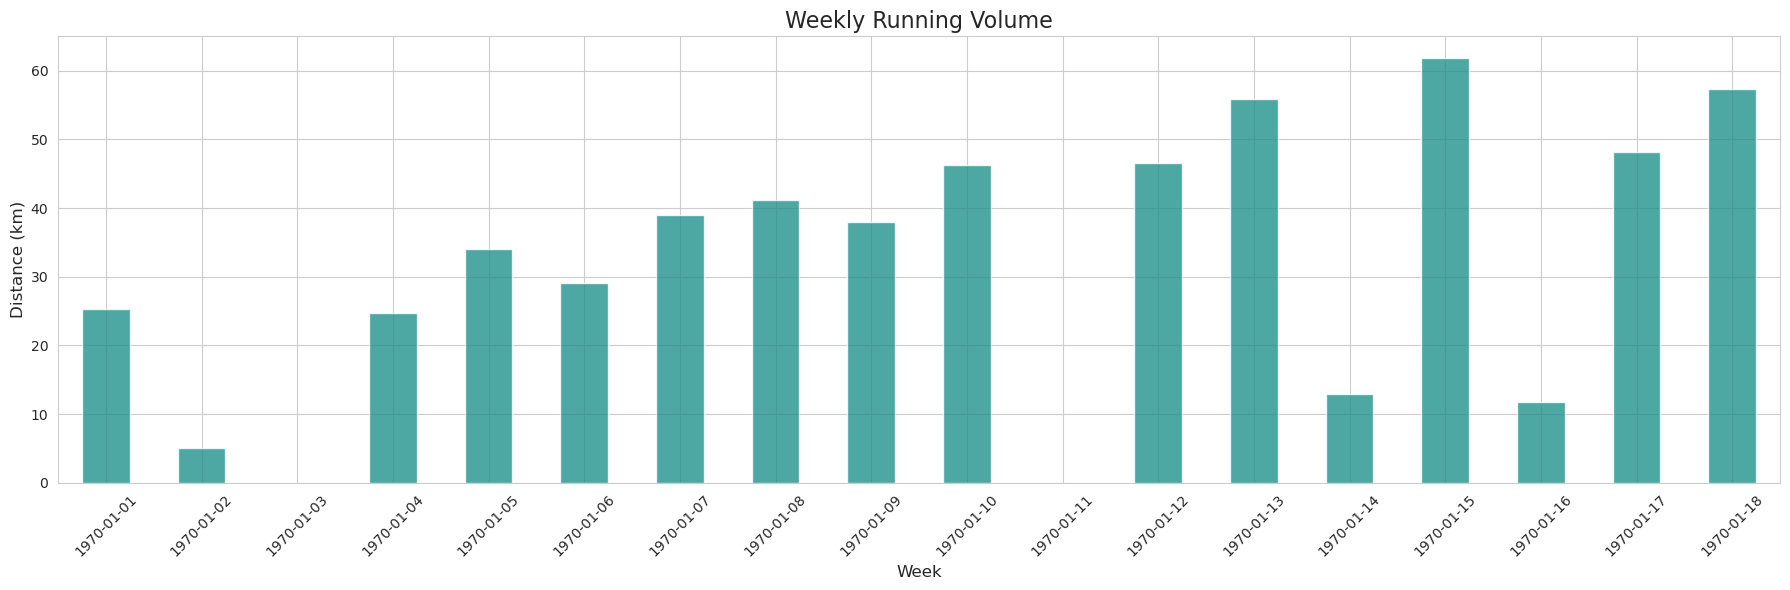

/home/agust/miniconda3/envs/marathon-data/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


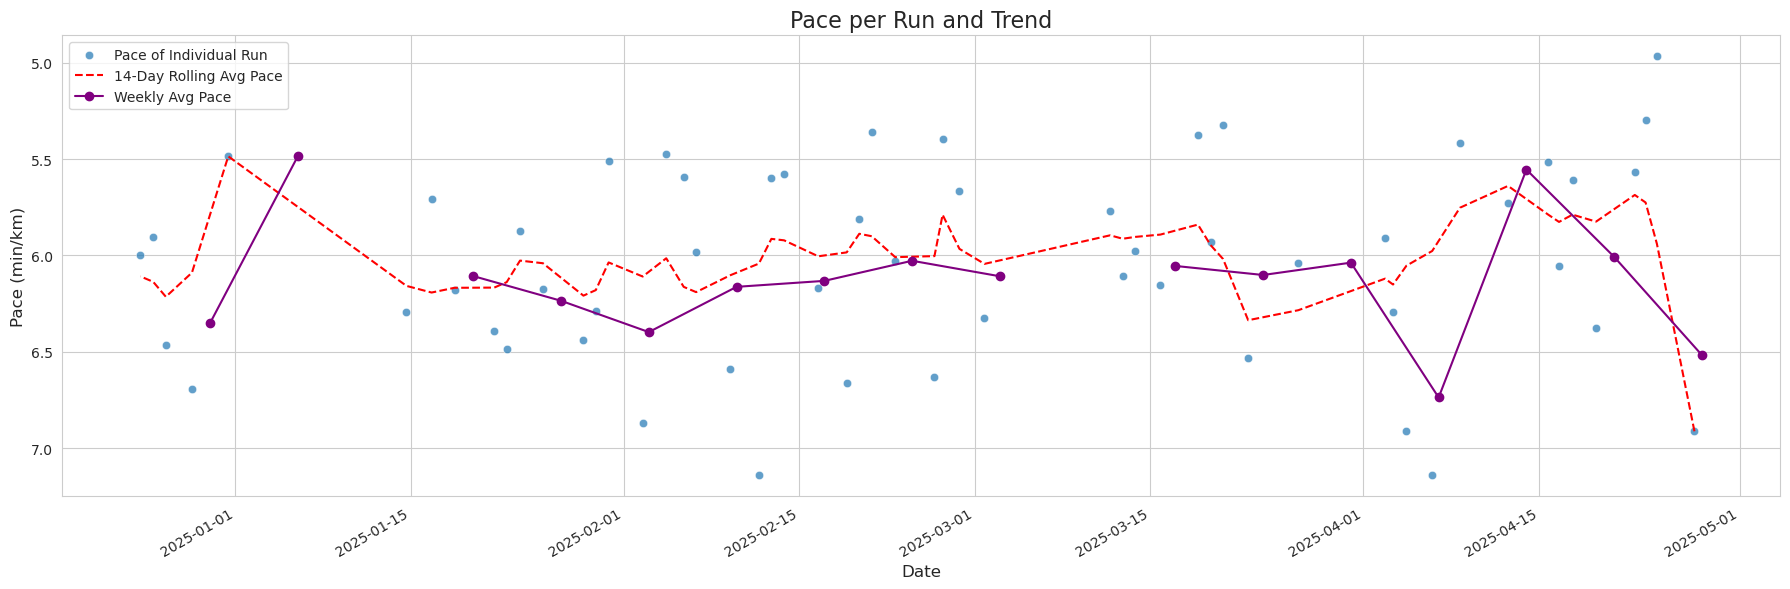

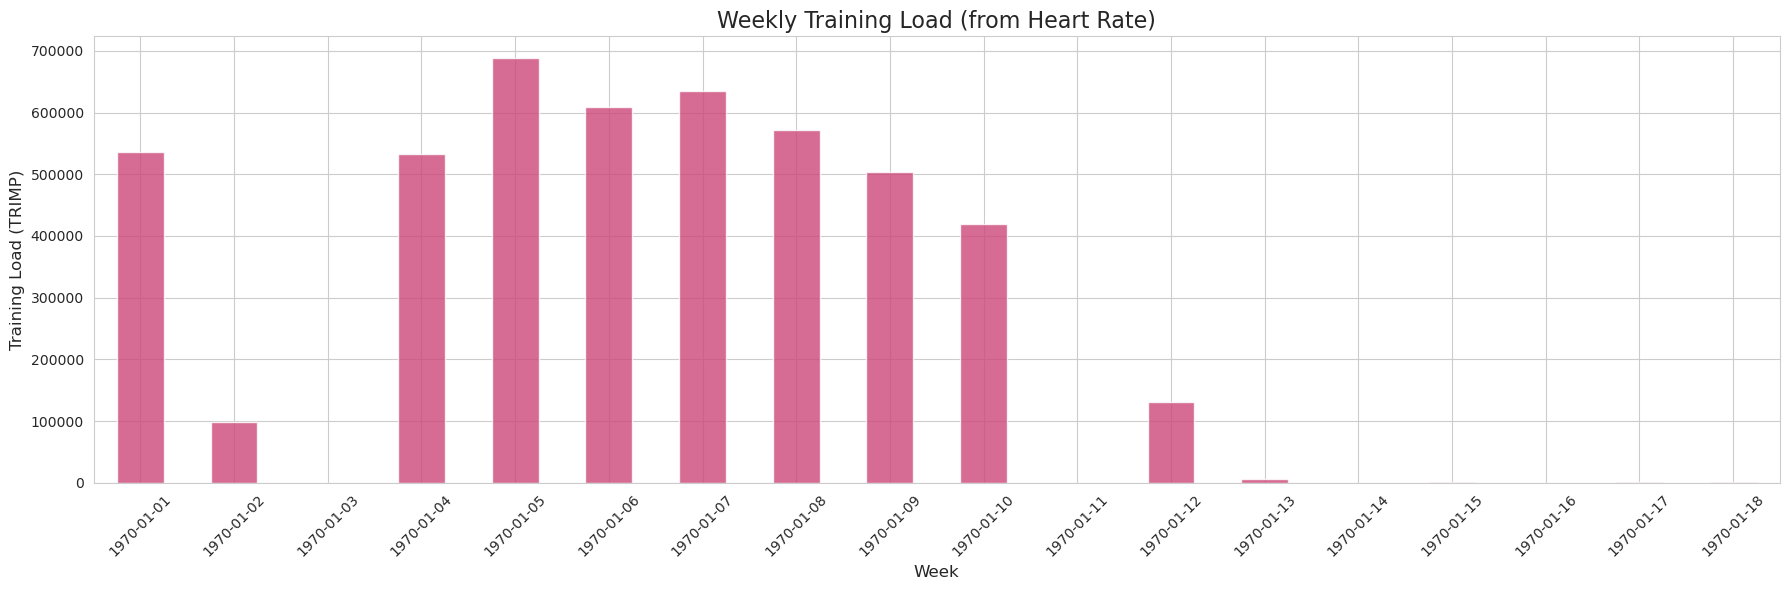

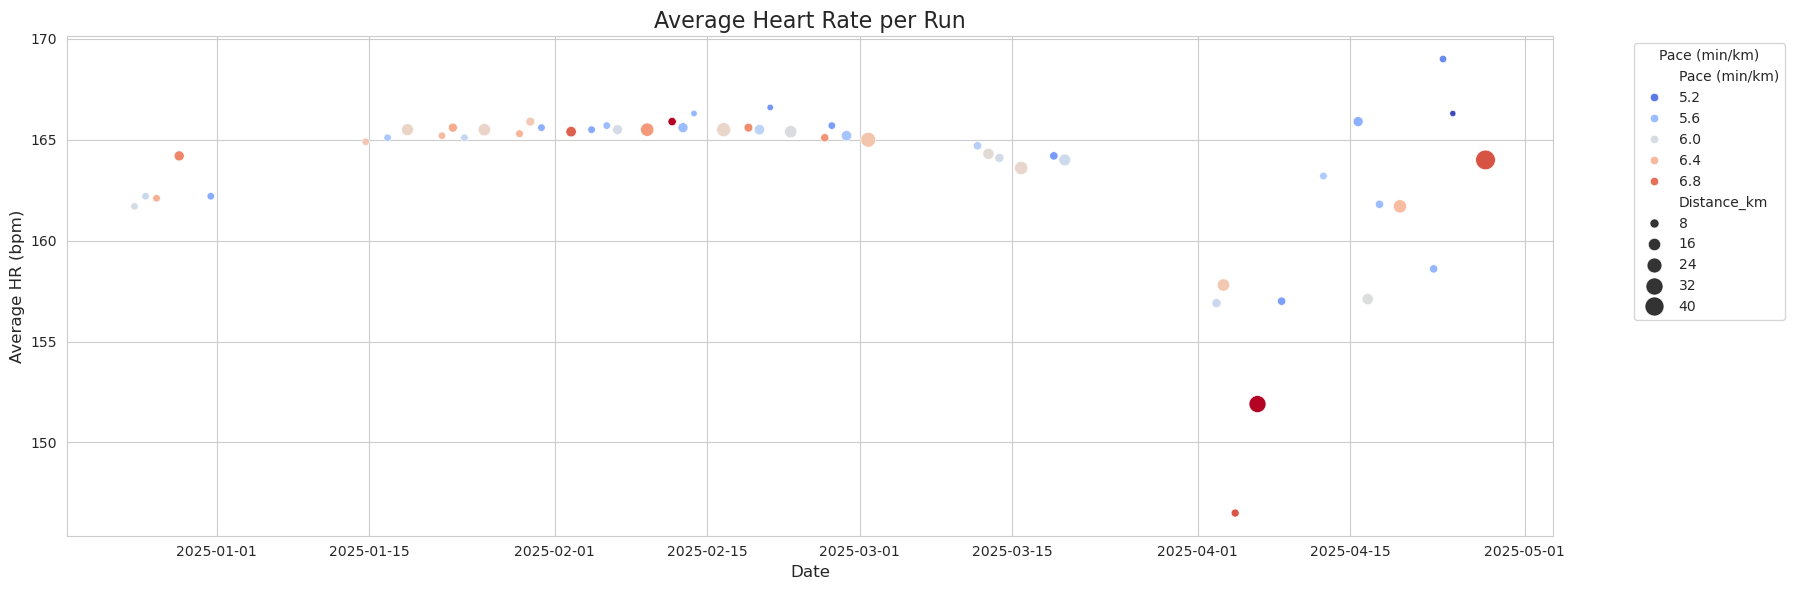

In [28]:
# --- 10. Time Series Analysis - Visualizations ---

# By creating separate figures for each plot, we avoid the x-axis conflict 
# between bar charts and line/scatter plots.

# --- Plot 1: Weekly Running Volume (Distance) ---
plt.figure(figsize=(18, 6))
ax1 = weekly_summary['Distance_km'].plot(kind='bar', color=sns.color_palette("viridis", 1)[0], alpha=0.8)
ax1.set_title('Weekly Running Volume', fontsize=16)
ax1.set_ylabel('Distance (km)', fontsize=12)
ax1.set_xlabel('Week', fontsize=12)
ax1.tick_params(axis='x', labelrotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()


# --- Plot 2: Pace of Each Run ---
plt.figure(figsize=(18, 6))
ax2 = sns.scatterplot(data=ts_df, x=ts_df.index, y='Pace (min/km)', label='Pace of Individual Run', alpha=0.7)
# Add a rolling average to see the trend
ts_df['Pace (min/km)'].rolling('14D').mean().plot(ax=ax2, color='red', linestyle='--', label='14-Day Rolling Avg Pace')
# Add weekly average pace to the plot
if 'Avg Pace (min/km)' in weekly_summary.columns:
    weekly_summary['Avg Pace (min/km)'].plot(ax=ax2, color='purple', linestyle='-', marker='o', label='Weekly Avg Pace')
ax2.set_title('Pace per Run and Trend', fontsize=16)
ax2.set_ylabel('Pace (min/km)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.invert_yaxis() # Lower pace is better, so we flip the axis
ax2.legend()
plt.tight_layout()
plt.show()


# --- Plot 3: Weekly Training Load (Heart Rate Based) ---
plt.figure(figsize=(18, 6))
ax3 = weekly_summary['Training Load (HR)'].plot(kind='bar', color=sns.color_palette("plasma", 1)[0], alpha=0.8, label='Weekly TRIMP (HR)')
ax3.set_title('Weekly Training Load (from Heart Rate)', fontsize=16)
ax3.set_ylabel('Training Load (TRIMP)', fontsize=12)
ax3.set_xlabel('Week', fontsize=12)
ax3.tick_params(axis='x', labelrotation=45)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()


# --- Heart Rate Analysis ---
# This plot was already separate and will continue to work as expected.
if 'Avg HR' in ts_df.columns and ts_df['Avg HR'].notna().any():
    plt.figure(figsize=(18, 6))
    sns.scatterplot(data=ts_df, x=ts_df.index, y='Avg HR', hue='Pace (min/km)', palette='coolwarm', size='Distance_km', sizes=(20, 200))
    plt.title('Average Heart Rate per Run', fontsize=16)
    plt.ylabel('Average HR (bpm)', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend(title='Pace (min/km)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()